In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

In [3]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout, to_agraph
import pygraphviz as pgv

from IPython.display import Image
def draw(A):
    return Image(A.draw(format='png', prog='dot'))

In [4]:
import sys
from pathlib import Path
home = str(Path.home())

sys.path.insert(0,"%s/rankability_toolbox_dev"%home)

In [5]:
import pyrankability

In [6]:
D2005 = pd.read_csv(home+'/college_football_analysis/data/Big12/2005.csv',header=None)
D2005

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,10,0,0,0,0,0,10,0,0,0
1,0,0,0,31,3,29,0,0,34,0,21,0
2,0,14,0,0,28,0,0,0,27,0,28,0
3,0,0,3,0,0,10,25,0,0,0,0,0
4,0,0,0,9,0,8,0,0,0,0,0,0
5,15,0,3,0,0,0,17,0,7,0,0,0
6,9,27,7,0,2,0,0,0,0,0,0,0
7,7,0,0,16,22,0,7,0,28,0,6,0
8,0,0,0,0,0,0,0,0,0,0,0,7
9,62,92,0,52,0,31,0,33,19,0,11,35


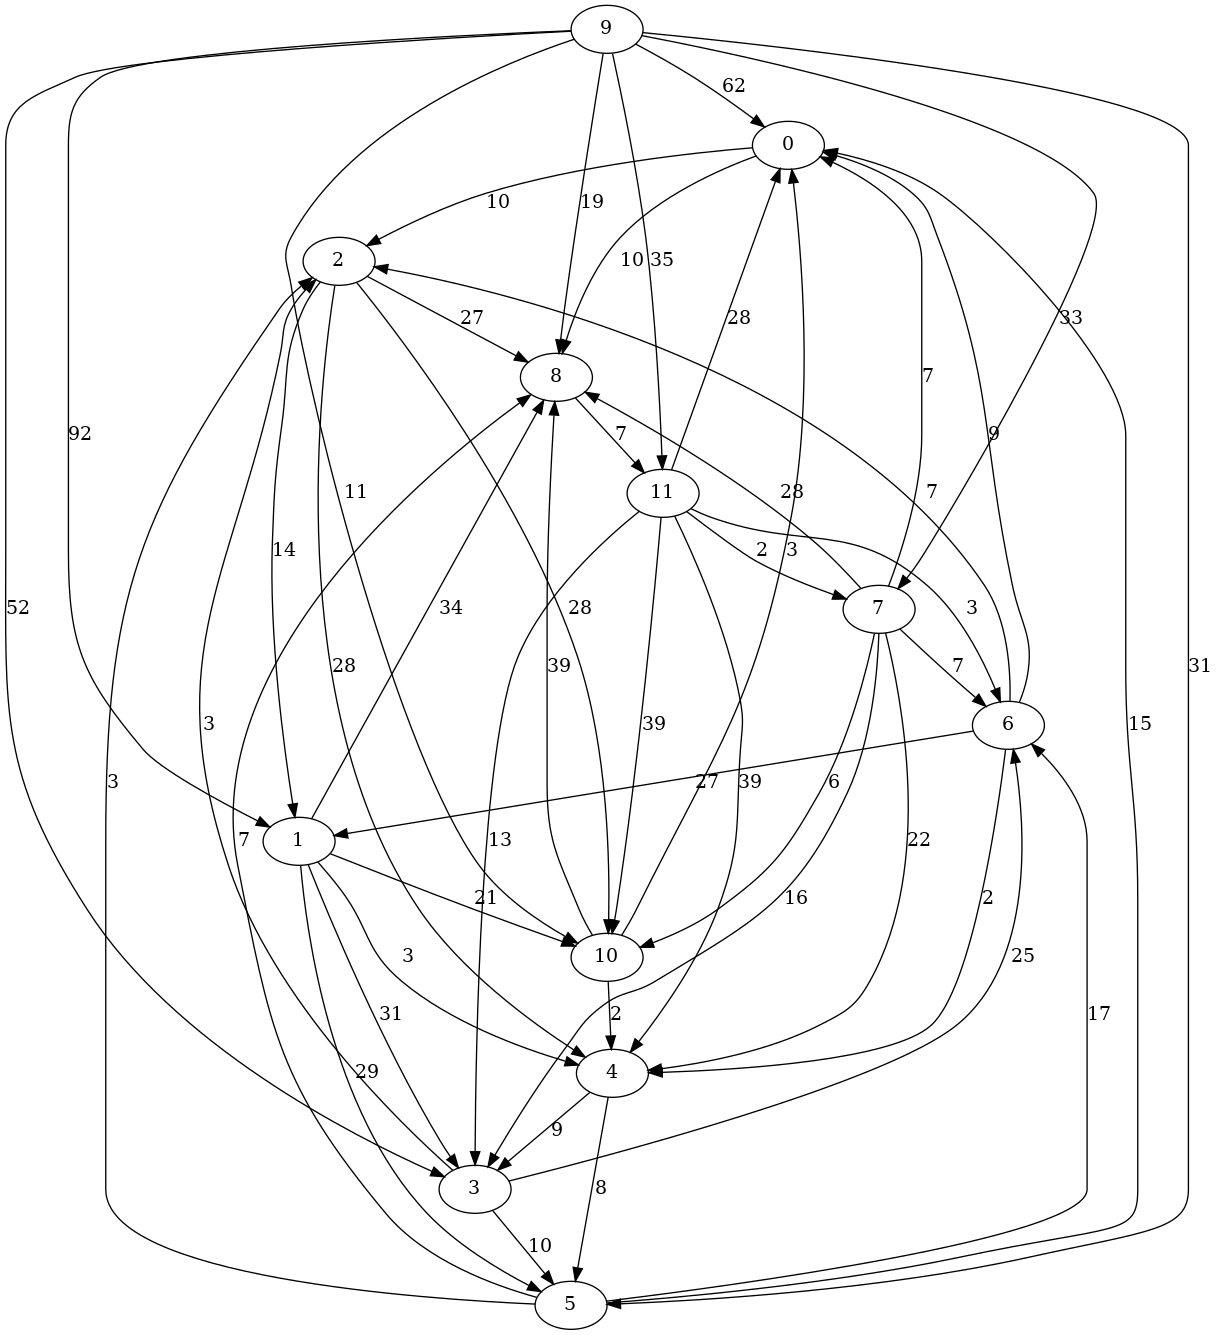

In [30]:
pyrankability.plot.D_as_graph(D2005,file='D2005_graph.png')

## Hillside BILP

In [7]:
k,details = pyrankability.rank.solve(D2005,method='hillside',cont=False)
k

Using license file /home/jupyter-pander14/gurobi.lic
Academic license - for non-commercial use only - expires 2021-01-17


255

### One solution

In [8]:
pd.Series(details['P'][0])

0      9
1     11
2      7
3      2
4      1
5      5
6      6
7     10
8      3
9      4
10     0
11     8
dtype: int64

In [9]:
pd.DataFrame(details['x'])

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,0,0,0,0,0,0,0,1,0,0,0
1,1,0,0,1,1,1,1,0,1,0,1,0
2,1,1,0,1,1,1,1,0,1,0,1,0
3,1,0,0,0,1,0,0,0,1,0,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,1,1,0,1,0,1,0,1,0
6,1,0,0,1,1,0,0,0,1,0,1,0
7,1,1,1,1,1,1,1,0,1,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,1,1,1,1,1,1,1,0,1,1


## Hillside LP

In [10]:
k,details = pyrankability.rank.solve(D2005,method='hillside',cont=True)
k

255

In [11]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.000000,0.000000,0.000000,0.0,0.427159,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000
1,1.000000,0.000000,0.356098,1.0,1.000000,1.0,1.0,0.000000,1.0,0.0,1.0,0.000000
2,1.000000,0.643902,0.000000,1.0,1.000000,1.0,1.0,0.000000,1.0,0.0,1.0,0.000000
3,1.000000,0.000000,0.000000,0.0,1.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000
4,0.572841,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.000000
5,1.000000,0.000000,0.000000,1.0,1.000000,0.0,1.0,0.000000,1.0,0.0,1.0,0.000000
6,1.000000,0.000000,0.000000,1.0,1.000000,0.0,0.0,0.000000,1.0,0.0,1.0,0.000000
7,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,0.000000,1.0,0.0,1.0,0.428709
8,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
9,1.000000,1.000000,1.000000,1.0,1.000000,1.0,1.0,1.000000,1.0,0.0,1.0,1.000000


## Most distant pairs

In [12]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D2005,method='hillside',verbose=False)
details_two_distant['obj']

3.0

In [13]:
def calc_tau(n,obj):
    nchoose2 = pyrankability.common.nCr(n,2)
    tau = (nchoose2 - obj)/nchoose2
    return tau

In [14]:
calc_tau(len(D2005),details_two_distant['obj'])

0.9545454545454546

In [15]:
details_two_distant['perm_x']

(9, 11, 7, 2, 1, 5, 6, 10, 3, 4, 0, 8)

In [16]:
details_two_distant['perm_y']

(9, 7, 11, 1, 2, 5, 6, 10, 3, 0, 4, 8)

In [17]:
list(details_two_distant['perm_x'])

[9, 11, 7, 2, 1, 5, 6, 10, 3, 4, 0, 8]

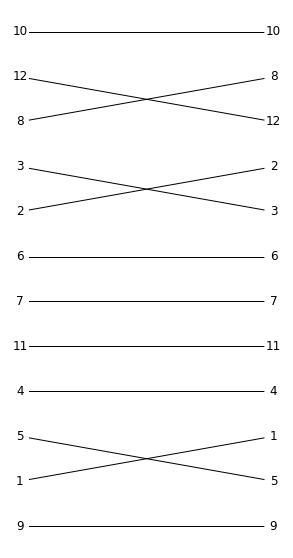

In [18]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_1_max_pair")

In [19]:
details_two_distant['obj']

3.0

## LOP

In [20]:
k,details = pyrankability.rank.solve(D2005,method='lop',cont=False)
k

59

In [21]:
pd.Series(details['P'][0])

0      9
1     11
2      7
3      2
4      1
5     10
6      4
7      3
8      5
9      6
10     0
11     8
dtype: int64

In [22]:
k_two_distant,details_two_distant = pyrankability.search.solve_pair_max_tau(D2005,method='lop',verbose=False)
details_two_distant['obj']

5.0

In [23]:
calc_tau(len(D2005),details_two_distant['obj'])

0.9242424242424242

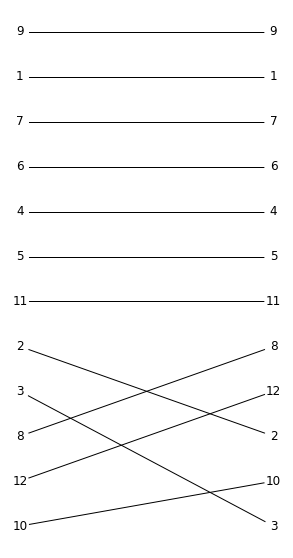

In [24]:
pyrankability.plot.spider(pyrankability.plot.AB_to_P2(1+np.array(details_two_distant['perm_x']),1+np.array(details_two_distant['perm_y'])),file="example_1_max_pair")

### LOP LP

In [25]:
k,details = pyrankability.rank.solve(D2005,method='lop',cont=True)
k

59

In [27]:
pd.DataFrame(pyrankability.common.threshold_x(details['x']))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000
1,1.0,0.000000,0.000000,1.0,1.0,1.0,1.0,0.545754,1.0,0.000000,1.0,0.484806
2,1.0,1.000000,0.000000,1.0,1.0,1.0,1.0,0.665287,1.0,0.398402,1.0,0.626419
3,1.0,0.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
4,1.0,0.000000,0.000000,1.0,0.0,1.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
5,1.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,1.0,0.000000,0.0,0.000000
6,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000
7,1.0,0.454246,0.334713,1.0,1.0,1.0,1.0,0.000000,1.0,0.000000,1.0,0.000000
8,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000
9,1.0,1.000000,0.601598,1.0,1.0,1.0,1.0,1.000000,1.0,0.000000,1.0,1.000000
